[IPython Notebook](ecc.ipynb) |  [Python Script](ecc.py)

Eccentricity (Volume Conservation)
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_binary()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Relevant Parameters
----------------------------

COMING SOON: discussion

In [3]:
print b.get(qualifier='ecc')

Qualifier: ecc
Description: Eccentricity
Value: 0.0
Constrained by: 
Constrains: ecosw@binary@component, esinw@binary@component, pot@primary@component, pot@secondary@component
Related to: per0@binary@component, ecosw@binary@component, esinw@binary@component, rpole@primary@component, q@binary@component, syncpar@primary@component, sma@binary@component, pot@primary@component, rpole@secondary@component, syncpar@secondary@component, pot@secondary@component


In [4]:
print b.get(qualifier='ecosw', context='component')

Qualifier: ecosw
Description: Eccentricity times cos of argument of periastron
Value: 0.0
Constrained by: ecc@binary@component, per0@binary@component
Constrains: None
Related to: ecc@binary@component, per0@binary@component


In [5]:
print b.get(qualifier='esinw', context='component')

Qualifier: esinw
Description: Eccentricity times sin of argument of periastron
Value: 0.0
Constrained by: ecc@binary@component, per0@binary@component
Constrains: None
Related to: ecc@binary@component, per0@binary@component


Relevant Constraints
-----------------------------

COMING SOON: discussion

In [6]:
b.filter(qualifier='pot', context='constraint')

<ParameterSet: 2 parameters | components: primary, secondary>

In [7]:
print b.get(qualifier='pot', component='primary', context='constraint')

Constrains (qualifier): pot
Expression in SI (value): rpole2potential({rpole@primary@component}, {q@binary@component}, {ecc@binary@component}, {syncpar@primary@component}, {sma@binary@component}, 1)
Current Result (result): 8.99227787671


In [8]:
print b.get(qualifier='ecosw', context='constraint')

Constrains (qualifier): ecosw
Expression in SI (value): {ecc@binary@component} * (cos({per0@binary@component}))
Current Result (result): 0.0


In [9]:
print b.get(qualifier='esinw', context='constraint')

Constrains (qualifier): esinw
Expression in SI (value): {ecc@binary@component} * (sin({per0@binary@component}))
Current Result (result): 0.0


Influence on Meshes (potentials, volumes)
----------------------------

COMING SOON: show how pot changes throughout the orbit for an eccentric orbit in order to conserve volume (and matches the defined value at periastron)

In [10]:
b.add_dataset('MESH', time=np.linspace(0,3,11))

<ParameterSet: 1 parameters>

In [11]:
b.set_value('ecc', 0.2)

In [12]:
b.run_compute()

<ParameterSet: 486 parameters | components: primary, secondary>

In [13]:
print b['pot@primary@model']

0.0@pot@primary@tmpmodel@model: 8.94740049696
0.3@pot@primary@tmpmodel@model: 8.86251125921
0.6@pot@primary@tmpmodel@model: 8.8230143047
0.9@pot@primary@tmpmodel@model: 8.8230143047
1.2@pot@primary@tmpmodel@model: 8.86251125921
1.5@pot@primary@tmpmodel@model: 8.94740049696
1.8@pot@primary@tmpmodel@model: 9.07981336323
2.1@pot@primary@tmpmodel@model: 9.21194163936
2.4@pot@primary@tmpmodel@model: 9.21194163936
2.7@pot@primary@tmpmodel@model: 9.07981336323
3.0@pot@primary@tmpmodel@model: 8.94740049696


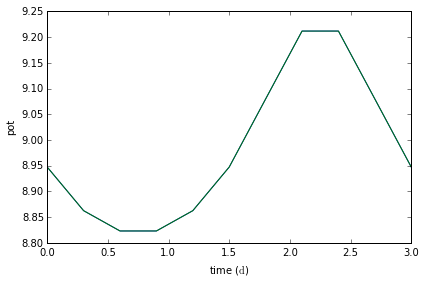

In [14]:
ax, artists = b['mesh01'].plot(x='time', y='pot')

In [15]:
print b['rpole@primary@model']

0.0@rpole@primary@tmpmodel@model: 1.03714300944 solRad
0.3@rpole@primary@tmpmodel@model: 1.04863573525 solRad
0.6@rpole@primary@tmpmodel@model: 1.05406976103 solRad
0.9@rpole@primary@tmpmodel@model: 1.05406976103 solRad
1.2@rpole@primary@tmpmodel@model: 1.04863573525 solRad
1.5@rpole@primary@tmpmodel@model: 1.03714300944 solRad
1.8@rpole@primary@tmpmodel@model: 1.01970793513 solRad
2.1@rpole@primary@tmpmodel@model: 1.0028818396 solRad
2.4@rpole@primary@tmpmodel@model: 1.0028818396 solRad
2.7@rpole@primary@tmpmodel@model: 1.01970793513 solRad
3.0@rpole@primary@tmpmodel@model: 1.03714300944 solRad


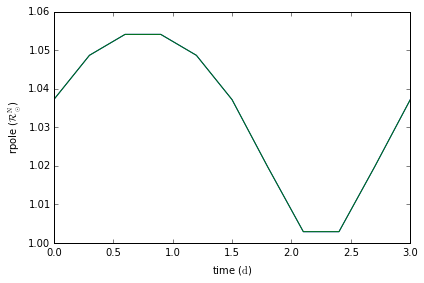

In [16]:
axs, artists = b['mesh01'].plot(x='time', y='rpole')

In [17]:
print b['volume@primary@model']

0.0@volume@primary@tmpmodel@model: 4.22927722712 solRad3
0.3@volume@primary@tmpmodel@model: 4.22927722712 solRad3
0.6@volume@primary@tmpmodel@model: 4.22927722712 solRad3
0.9@volume@primary@tmpmodel@model: 4.22927722712 solRad3
1.2@volume@primary@tmpmodel@model: 4.22927722712 solRad3
1.5@volume@primary@tmpmodel@model: 4.22927722712 solRad3
1.8@volume@primary@tmpmodel@model: 4.22927722712 solRad3
2.1@volume@primary@tmpmodel@model: 4.22927722712 solRad3
2.4@volume@primary@tmpmodel@model: 4.22927722712 solRad3
2.7@volume@primary@tmpmodel@model: 4.22927722712 solRad3
3.0@volume@primary@tmpmodel@model: 4.22927722712 solRad3


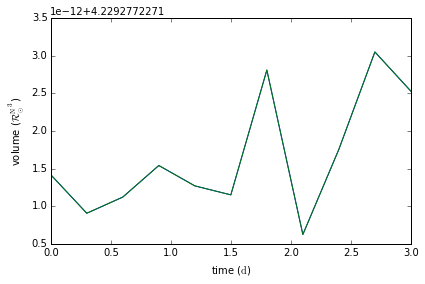

In [18]:
ax, artists = b['mesh01'].plot(x='time', y='volume')

In [19]:
b.remove_dataset('mesh01')

Influence on Radial Velocities
----------------------------------

COMING SOON: show RVs at various values of ecc

In [20]:
b.add_dataset('RV', time=np.linspace(0,3,51))

<ParameterSet: 31 parameters | contexts: compute, dataset>

In [21]:
b.run_compute()

<ParameterSet: 4 parameters | components: primary, secondary>

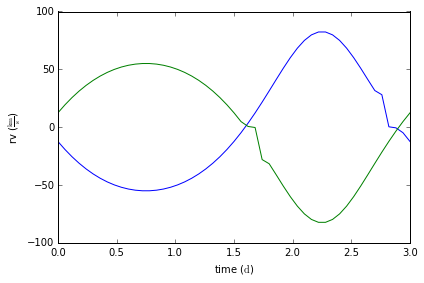

In [22]:
axs, artists = b.plot()

In [23]:
b.remove_dataset('rv01')

Influence on Light Curves (fluxes)
-----------------------------------------

COMING SOON: show LCs at various values of ecc, and discuss ecosw, esinw

In [24]:
b.add_dataset('LC', time=np.linspace(0,3,51))

<ParameterSet: 20 parameters | contexts: compute, dataset>

In [25]:
b.run_compute()

<ParameterSet: 2 parameters | qualifiers: flux, time>

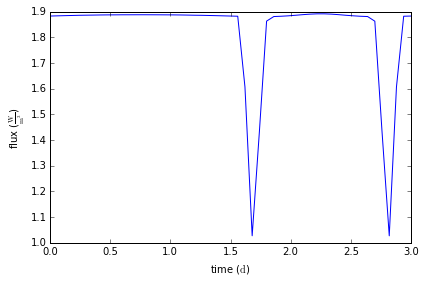

In [26]:
axs, artists = b.plot()